The function calls and implementation details of pymoo were referenced from the official documentation (https://pymoo.org/algorithms/moo/nsga2.html).

# Initialization section

In [185]:
# pip install pymoo

In [186]:
# pip install pygmo

In [187]:
from implementation import nsga2, Individual
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.core.population import Population
from pymoo.visualization.scatter import Scatter
import pygmo as pg
from matplotlib import pyplot as plt
import numpy as np
from pymoo.indicators.hv import HV


In [188]:
from test_functions import ZDT1, ZDT2, ZDT3

In [189]:
population_size = 100 
num_variables = 30
num_generations = 500
tournament_size = 3
mutation_prob = 0.033
elitism_size = 10
objective_function=ZDT3
objective_function_text = "zdt3"
reference_point=[1.2,1.5] 

In [190]:
initial_population = [Individual(num_variables, objective_function) 
                       for _ in range(population_size)]

# HV (Hypervolume) comparison

In [191]:
def calc_hv_nsga2(population_size, num_variables, num_generations, tournament_size,
                  mutation_prob, elitism_size, objective_function, reference_point):
    """
    Calculate hypervolumen of my implementation of nsga2 algorithm
    """
    final_pareto_front = nsga2(population_size=population_size, 
                         num_variables=num_variables,
                         num_generations=num_generations, 
                         tournament_size=tournament_size,
                         mutation_prob=mutation_prob, 
                         elitism_size=elitism_size,
                         objective_function=objective_function,
                         initial_population=initial_population)
    pareto_front = [(ind.fitness[0], ind.fitness[1]) for ind in final_pareto_front]
    pareto_front_array = np.array(pareto_front)
    hv = pg.hypervolume(pareto_front_array)
    return hv.compute(reference_point)

In [192]:
def calc_hv_pymoo(population_size, num_generations, problem_name, reference_point, initial_population):
    """
    Calculate hypervolumen of pymoo implementation of nsga2 algorithm
    """
    problem = get_problem(problem_name)
    algorithm = NSGA2(pop_size=population_size)
    X = np.array([ind.code for ind in initial_population])
    res = minimize(problem, 
                   algorithm, 
                   ('n_gen', num_generations), 
                   seed=1, 
                   verbose=False,
                  pop=Population.new("X",X))
    hv = pg.hypervolume(res.F)
    return hv.compute(reference_point)

In [193]:
hv_nsga2 = calc_hv_nsga2(population_size, num_variables, 
                         num_generations, tournament_size, 
                         mutation_prob, elitism_size, objective_function, 
                         reference_point)
hv_pymoo = calc_hv_pymoo(population_size,num_generations, 
                         objective_function_text, reference_point, initial_population)

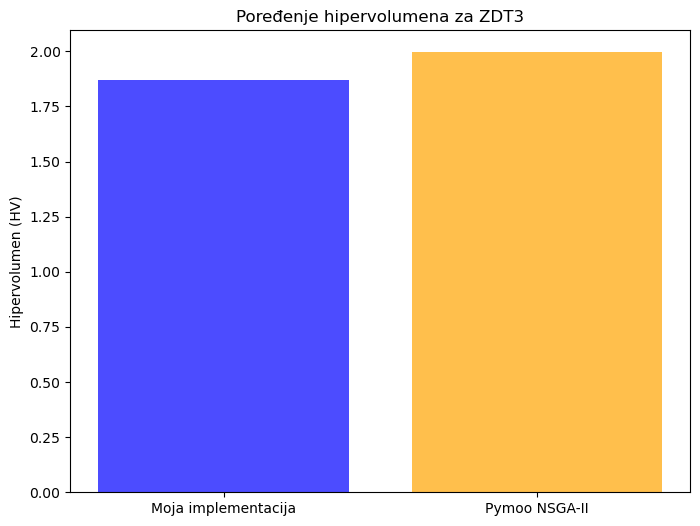

In [194]:
labels = ['Moja implementacija', 'Pymoo NSGA-II']
values = [hv_nsga2, hv_pymoo]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Hipervolumen (HV)')
plt.title(f'Poređenje hipervolumena za {objective_function_text.upper()}')
plt.show()

# MS (Maximal spread) comparison

In [195]:
def calc_ms_nsga2(population_size, num_variables, num_generations, tournament_size,
                   mutation_prob, elitism_size, objective_function,
                   initial_population):
    """
    Calculate maximal spread of my implementation of nsga2 algorithm
    """
    final_pareto_front = nsga2(population_size=population_size, 
                                num_variables=num_variables,
                                num_generations=num_generations, 
                                tournament_size=tournament_size,
                                mutation_prob=mutation_prob, 
                                elitism_size=elitism_size,
                                objective_function=objective_function,
                                initial_population=initial_population)
    pareto_front = [(ind.fitness[0], ind.fitness[1]) for ind in final_pareto_front]
    pareto_front = np.array(pareto_front)
    pareto_front_sorted = pareto_front[np.argsort(pareto_front[:, 0])]
    distances = np.linalg.norm(np.diff(pareto_front_sorted, axis=0), axis=1)
    ms = np.sum(distances) / len(distances)
    return ms

In [196]:
def calc_ms_pymoo(population_size, num_generations, 
                  problem_name, initial_population):
    """
    Calculate maximal spread of pymoo implementation of nsga2 algorithm
    """
    problem = get_problem(problem_name)
    algorithm = NSGA2(pop_size=population_size)
    X = np.array([ind.code for ind in initial_population])
    res = minimize(problem, 
                   algorithm, 
                   ('n_gen', num_generations), 
                   seed=1, 
                   verbose=False,
                  pop=Population.new("X",X))
    pareto_front = res.F
    pareto_front = np.array(pareto_front)
    pareto_front_sorted = pareto_front[np.argsort(pareto_front[:, 0])]
    distances = np.linalg.norm(np.diff(pareto_front_sorted, axis=0), axis=1)
    ms = np.sum(distances) / len(distances) 
    return ms
    

In [197]:
ms_nsga2 = calc_ms_nsga2(population_size, num_variables, 
              num_generations, tournament_size,
              mutation_prob, elitism_size, 
              objective_function, initial_population)
ms_pymoo = calc_ms_pymoo(population_size, num_generations, 
                         objective_function_text, initial_population)

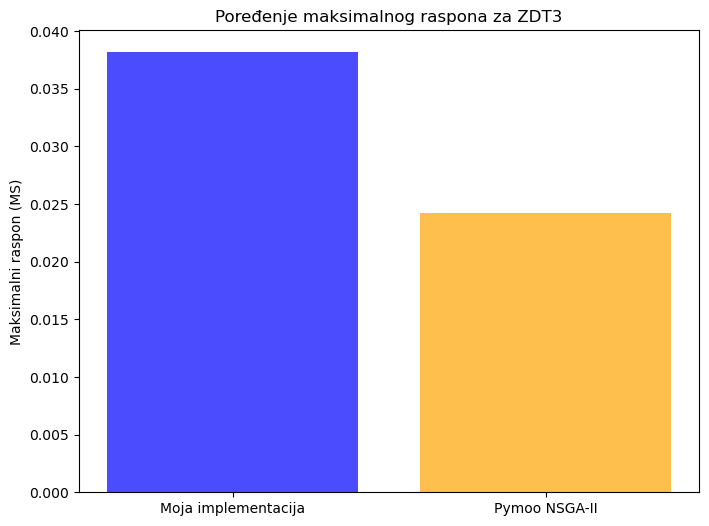

In [198]:
labels = ['Moja implementacija', 'Pymoo NSGA-II']
values = [ms_nsga2, ms_pymoo]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Maksimalni raspon (MS)')
plt.title(f'Poređenje maksimalnog raspona za {objective_function_text.upper()}')
plt.show()

# Final Pareto Front distribution comparison

In [199]:
final_pareto_front_nsga2 = nsga2(population_size, num_variables, 
              num_generations, tournament_size,
              mutation_prob, elitism_size, 
              objective_function, initial_population)

In [200]:
problem = get_problem(objective_function_text)

algorithm = NSGA2(pop_size=population_size)
X = np.array([ind.code for ind in initial_population])
res = minimize(problem, 
               algorithm, 
               ('n_gen', num_generations), 
               seed=1, 
               verbose=False,
              pop=Population.new("X",X))
final_pareto_front_pymoo = res.F 

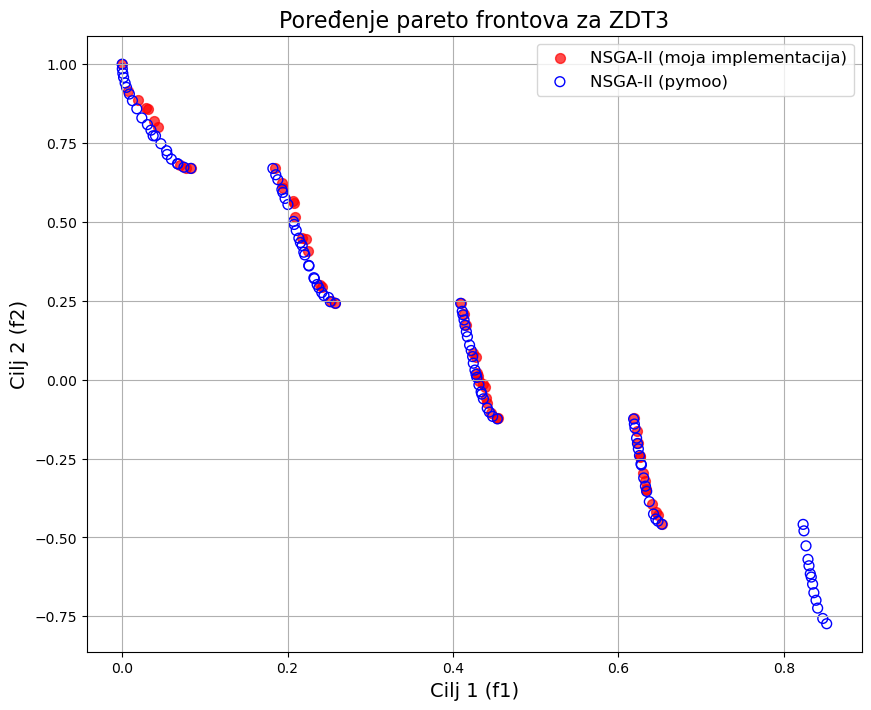

In [201]:

pareto_f1_values_nsga2 = [ind.fitness[0] for ind in final_pareto_front_nsga2]
pareto_f2_values_nsga2 = [ind.fitness[1] for ind in final_pareto_front_nsga2]

pareto_f1_values_pymoo = res.F[:, 0]
pareto_f2_values_pymoo = res.F[:, 1] 

true_pareto_f1 = final_pareto_front_pymoo[:, 0]
true_pareto_f2 = final_pareto_front_pymoo[:, 1]
plt.figure(figsize=(10, 8))
plt.scatter(pareto_f1_values_nsga2, pareto_f2_values_nsga2, c='red', label='NSGA-II (moja implementacija)', s=50, alpha=0.7)
plt.scatter(pareto_f1_values_pymoo, pareto_f2_values_pymoo, edgecolor='blue', facecolor='none', label='NSGA-II (pymoo)', s=50)

plt.xlabel('Cilj 1 (f1)', fontsize=14)
plt.ylabel('Cilj 2 (f2)', fontsize=14)
plt.title(f'Poređenje pareto frontova za {objective_function_text.upper()}', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()